In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from summarytools import dfSummary
import random as random
import squarify


In [2]:
data = pd.read_csv('financial_loan.csv')
data.head(5)

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [3]:
data.shape

(38576, 24)

In [4]:
data.describe().apply(lambda s: s.apply('{0:.0f}'.format))

,id,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,38576,38576,38576,38576,38576,38576,38576,38576,38576
mean,681037,847652,69645,0,327,0,11296,22,12263
std,211325,266810,64294,0,209,0,7461,11,9051
min,54734,70699,4000,0,16,0,500,2,34
25%,513517,662979,41500,0,168,0,5500,14,5633
50%,662728,847356,60000,0,283,0,10000,20,10042
75%,836506,1045652,83200,0,434,0,15000,29,16658
max,1077501,1314167,6000000,0,1305,0,35000,90,58564


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [6]:
data.isna().sum()

id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

In [7]:
data['issue_date'] = pd.to_datetime(data['issue_date'],dayfirst=True)
data['month'] = data['issue_date'].dt.month
print(data['month'])

0         2
1         1
2         1
3         2
4         1
         ..
38571     7
38572    10
38573     9
38574    10
38575     7
Name: month, Length: 38576, dtype: int32


## Dashboard 1: Sumamry

1. Total Loan Applications

In [8]:
print("Total Loan Applications : " , data['id'].count())

Total Loan Applications :  38576


In [57]:
total_loan = data.groupby(data['month']).agg(
    total_loan_id = ('id','size')
).reset_index() 
print(total_loan)

    month  total_loan_id
0       1           2332
1       2           2279
2       3           2627
3       4           2755
4       5           2911
5       6           3184
6       7           3366
7       8           3441
8       9           3536
9      10           3796
10     11           4035
11     12           4314


In [60]:
monthly_changes = total_loan.pct_change() * 100
print(monthly_changes)

         month  total_loan_id
0          NaN            NaN
1   100.000000      -2.272727
2    50.000000      15.269855
3    33.333333       4.872478
4    25.000000       5.662432
5    20.000000       9.378221
6    16.666667       5.716080
7    14.285714       2.228164
8    12.500000       2.760825
9    11.111111       7.352941
10   10.000000       6.296101
11    9.090909       6.914498


2.	Total Funded Amount

In [11]:
print("Total Funded Amount : ",data['loan_amount'].sum())

Total Funded Amount :  435757075


In [12]:
total_amount = data.groupby(data['month']).agg(
    total_loan_amount=('loan_amount', 'sum')
).reset_index() 
print(total_amount)

    month  total_loan_amount
0       1           25031650
1       2           24647825
2       3           28875700
3       4           29800800
4       5           31738350
5       6           34161475
6       7           35813900
7       8           38149600
8       9           40907725
9      10           44893800
10     11           47754825
11     12           53981425


In [54]:
monthly_changes = total_amount.pct_change() * 100
print(monthly_changes)

         month  total_loan_amount
0          NaN                NaN
1   100.000000          -1.533359
2    50.000000          17.153136
3    33.333333           3.203732
4    25.000000           6.501671
5    20.000000           7.634691
6    16.666667           4.837101
7    14.285714           6.521769
8    12.500000           7.229761
9    11.111111           9.744064
10   10.000000           6.372873
11    9.090909          13.038682


3.	Total Amount Received

In [14]:
print("Total Amount Received : ",data['total_payment'].sum())

Total Amount Received :  473070933


In [15]:
total_payment = data.groupby(data['month']).agg(
    total_payment=('total_payment', 'sum')
).reset_index() 
print(total_payment)

    month  total_payment
0       1       27578836
1       2       27717745
2       3       32264400
3       4       32495533
4       5       33750523
5       6       36164533
6       7       38827220
7       8       42682218
8       9       43983948
9      10       49399567
10     11       50132030
11     12       58074380


In [16]:
monthly_changes = total_payment.pct_change() * 100
print(monthly_changes)

         month  total_payment
0          NaN            NaN
1   100.000000       0.503680
2    50.000000      16.403409
3    33.333333       0.716372
4    25.000000       3.862039
5    20.000000       7.152511
6    16.666667       7.362703
7    14.285714       9.928596
8    12.500000       3.049818
9    11.111111      12.312717
10   10.000000       1.482732
11    9.090909      15.842865


4. Average Interest Rate

In [17]:
print("Average Interest Rate : ",data['int_rate'].mean()*100)

Average Interest Rate :  12.048831397760265


In [18]:
monthly_applications = data.groupby(data['month']).agg(
    total_loan_id=('id','size'),
    average_interest_month=('int_rate', 'mean')
).reset_index() 
print(monthly_applications)

    month  total_loan_id  average_interest_month
0       1           2332                0.114619
1       2           2279                0.117216
2       3           2627                0.118583
3       4           2755                0.117409
4       5           2911                0.122578
5       6           3184                0.122742
6       7           3366                0.122372
7       8           3441                0.123002
8       9           3536                0.120032
9      10           3796                0.120241
10     11           4035                0.119417
11     12           4314                0.123560


In [19]:
monthly_changes = monthly_applications.pct_change() * 100
print(monthly_changes)

         month  total_loan_id  average_interest_month
0          NaN            NaN                     NaN
1   100.000000      -2.272727                2.266167
2    50.000000      15.269855                1.165866
3    33.333333       4.872478               -0.989885
4    25.000000       5.662432                4.402446
5    20.000000       9.378221                0.134188
6    16.666667       5.716080               -0.301493
7    14.285714       2.228164                0.514808
8    12.500000       2.760825               -2.414612
9    11.111111       7.352941                0.174039
10   10.000000       6.296101               -0.685333
11    9.090909       6.914498                3.469546


5. Average Debt-to-Income Ratio (DTI)

In [20]:
print("Average DTI : ",data['dti'].mean()*100)

Average DTI :  13.327433119037742


In [21]:
monthly_applications = data.groupby(data['month']).agg(
    total_loan_id=('id','size'),
    average_DTI=('dti', 'mean')
).reset_index() 
print(monthly_applications)

    month  total_loan_id  average_DTI
0       1           2332     0.129370
1       2           2279     0.134093
2       3           2627     0.132156
3       4           2755     0.132194
4       5           2911     0.133337
5       6           3184     0.132438
6       7           3366     0.132948
7       8           3441     0.133532
8       9           3536     0.132978
9      10           3796     0.134144
10     11           4035     0.133027
11     12           4314     0.136655


In [22]:
monthly_changes = monthly_applications.pct_change() * 100
print(monthly_changes)

         month  total_loan_id  average_DTI
0          NaN            NaN          NaN
1   100.000000      -2.272727     3.651107
2    50.000000      15.269855    -1.444620
3    33.333333       4.872478     0.028348
4    25.000000       5.662432     0.865271
5    20.000000       9.378221    -0.674702
6    16.666667       5.716080     0.385346
7    14.285714       2.228164     0.439388
8    12.500000       2.760825    -0.414759
9    11.111111       7.352941     0.876330
10   10.000000       6.296101    -0.832296
11    9.090909       6.914498     2.727291


# Good Loan v Bad Loan KPI’s

GOOO LOAN ISSUED

In [23]:
good = (data['loan_status'] == 'Fully Paid') | (data['loan_status'] == 'Current')
total_loans_count = data['id'].count()

In [24]:
good_loan = data[good].count()
print("Good Loan Percentage : ", (good_loan['id'] / total_loans_count) * 100.0)

Good Loan Percentage :  86.17534218166736


In [25]:
print("Good Loan Applications : ",good_loan['id'])

Good Loan Applications :  33243


In [26]:
good_loan_funded_amount = data.loc[good, 'loan_amount'].sum()
print("Good Loan Amount Fund:", good_loan_funded_amount)

Good Loan Amount Fund: 370224850


In [27]:
good_loan_funded_amount = data.loc[good, 'total_payment'].sum()
print("Good Loan Amount Received:", good_loan_funded_amount)

Good Loan Amount Received: 435786170


BAD LOAN ISSUED

In [28]:
bad = (data['loan_status'] == 'Charged Off')

In [29]:
bad_loan = data[bad].count()
print("Bad Loan Percentage : ", (bad_loan['id'] / total_loans_count) * 100.0)

Bad Loan Percentage :  13.824657818332643


In [30]:
print("Bad Loan Applications : ",bad_loan['id'])

Bad Loan Applications :  5333


In [31]:
bad_loan_funded_amount = data.loc[bad, 'loan_amount'].sum()
print("Bad Loan Amount Fund:", bad_loan_funded_amount)

Bad Loan Amount Fund: 65532225


In [32]:
bad_loan_funded_amount = data.loc[bad, 'total_payment'].sum()
print("Bad Loan Amount Received:", bad_loan_funded_amount)

Bad Loan Amount Received: 37284763


# Dashboard 2: Overview

1. Monthly Trends by Issue Date (Line Chart)

In [33]:
dashboard1 = pd.concat([total_loan['month'],total_loan['total_loan_id'],total_amount['total_loan_amount'],total_payment['total_payment']],axis=1)
dashboard1

,month,total_loan_id,total_loan_amount,total_payment
0,1,2332,25031650,27578836
1,2,2279,24647825,27717745
2,3,2627,28875700,32264400
3,4,2755,29800800,32495533
4,5,2911,31738350,33750523
5,6,3184,34161475,36164533
6,7,3366,35813900,38827220
7,8,3441,38149600,42682218
8,9,3536,40907725,43983948
9,10,3796,44893800,49399567


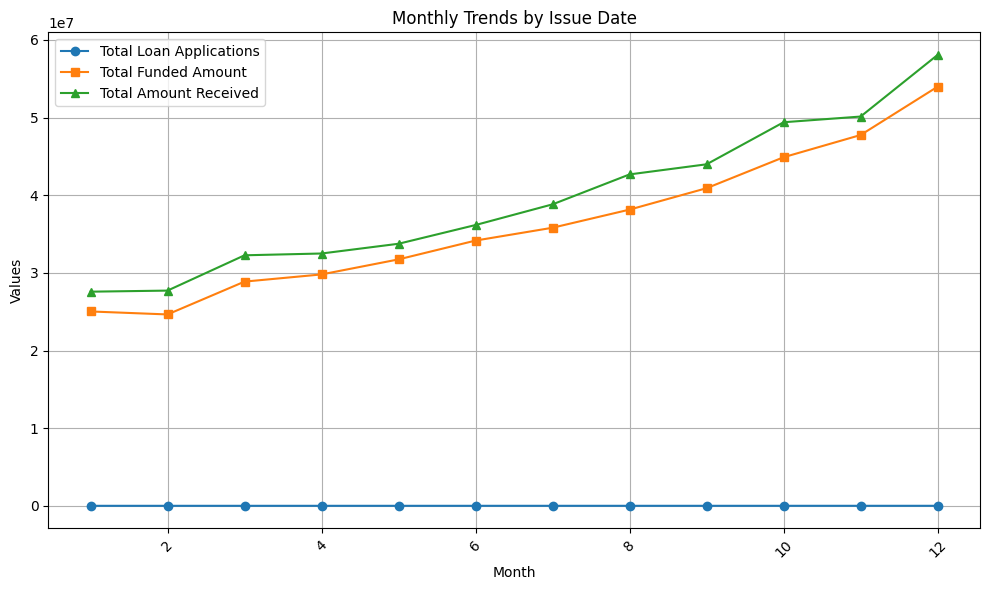

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(dashboard1['month'], dashboard1['total_loan_id'], marker='o', label='Total Loan Applications')
plt.plot(dashboard1['month'], dashboard1['total_loan_amount'], marker='s', label='Total Funded Amount')
plt.plot(dashboard1['month'], dashboard1['total_payment'], marker='^', label='Total Amount Received')
plt.title('Monthly Trends by Issue Date')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2. Regional Analysis by State (BarH Plot)

In [35]:
address_state = data.groupby(data['address_state']).agg(
    total_loan = ('id','size'),
    total_amount = ('loan_amount' , 'sum'),
    total_payment=('total_payment', 'sum')
).reset_index() 
address_state

,address_state,total_loan,total_amount,total_payment
0,AK,78,1031800,1108570
1,AL,432,4949225,5492272
2,AR,236,2529700,2777875
3,AZ,833,9206000,10041986
4,CA,6894,78484125,83901234
5,CO,770,8976000,9845810
6,CT,730,8435575,9357612
7,DC,214,2652350,2921854
8,DE,110,1138100,1269136
9,FL,2773,30046125,31601905


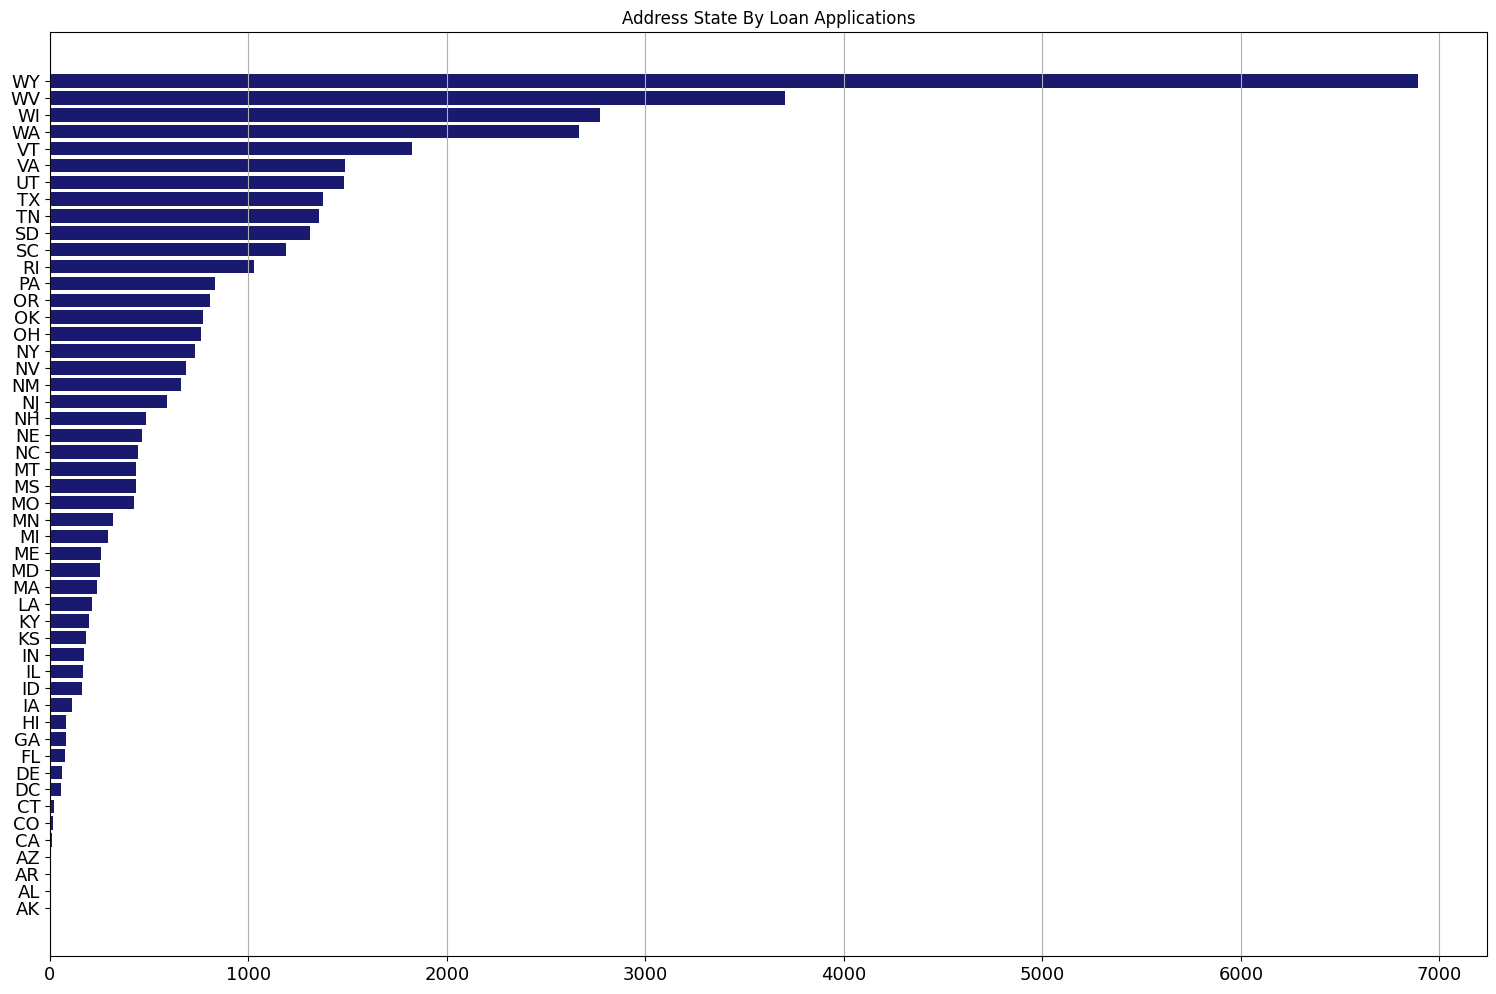

In [36]:
plt.figure(figsize=(15,10))
plt.barh(y=address_state['address_state'],width=sorted(address_state['total_loan'],reverse=False),color = "midnightblue")
plt.title('Address State By Loan Applications')
plt.tight_layout()
plt.grid(visible=True,axis='x')
plt.autoscale(enable=True)
plt.xticks( fontsize = 13)
plt.yticks( fontsize = 13)
plt.show()

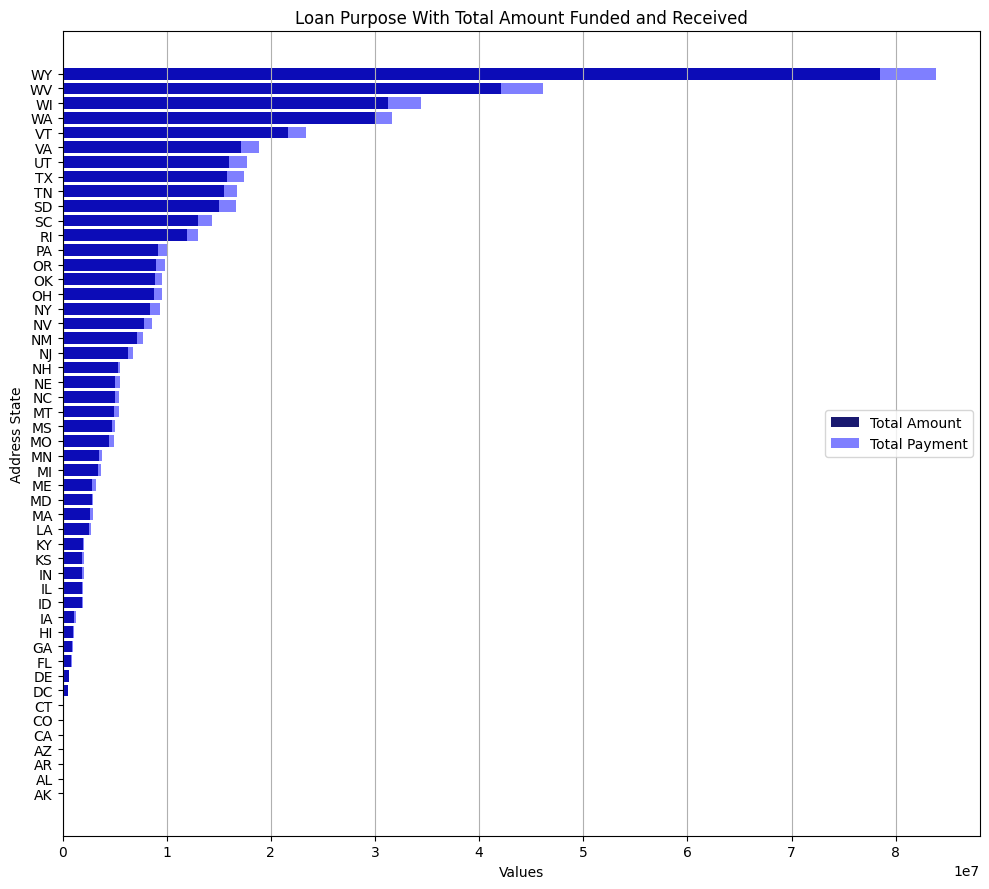

In [37]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 9))
bars1 = ax.barh(y=address_state['address_state'], width=sorted(address_state['total_amount']), label='Total Amount', color='midnightblue',alpha=1)
bars2 = ax.barh(y=address_state['address_state'], width=sorted(address_state['total_payment']), label='Total Payment', color='blue', alpha=0.5)
ax.set_xlabel('Values')
ax.set_ylabel('Address State')
ax.set_title('Loan Purpose With Total Amount Funded and Received')
ax.legend(loc = 'center right')
plt.tight_layout()
plt.grid(axis='x')
plt.show()


3. Loan Term Analysis (Donut Chart)

In [38]:
data['term']
loan_terms = data.groupby(data['term']).agg(
    total_loan = ('id' , 'size'),
    total_amount = ('loan_amount','sum'),
    total_payment = ('total_payment' , 'sum')
).reset_index()
loan_terms

,term,total_loan,total_amount,total_payment
0,36 months,28237,273041225,294709458
1,60 months,10339,162715850,178361475


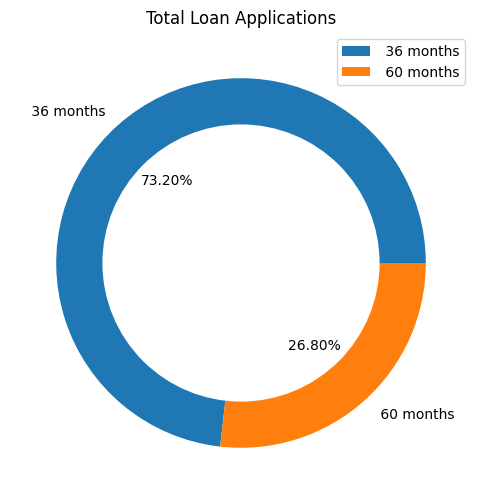

In [39]:
plt.figure(figsize=(10, 6))
plt.pie(x=loan_terms['total_loan'],labels = loan_terms['term'],autopct='%.2f%%')
plt.title('Total Loan Applications')
plt.legend(loc = 'upper right')
circle = plt.Circle(xy=(0,0),radius=.75,facecolor = 'white')
plt.gca().add_artist(circle)
plt.show()

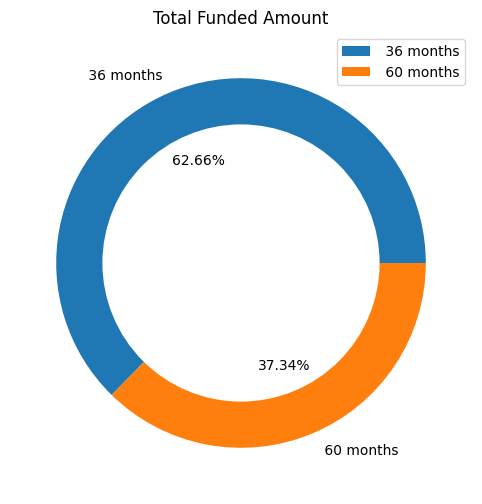

In [40]:
plt.figure(figsize=(10, 6))
plt.pie(x=loan_terms['total_amount'],labels = loan_terms['term'],autopct='%.2f%%')
plt.title('Total Funded Amount')
plt.legend(loc = 'upper right')
circle = plt.Circle(xy=(0,0),radius=.75,facecolor = 'white')
plt.gca().add_artist(circle)
plt.show()

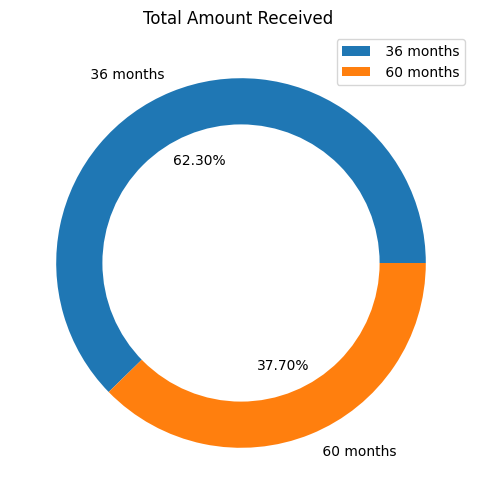

In [41]:
plt.figure(figsize=(10, 6))
plt.pie(x=loan_terms['total_payment'],labels = loan_terms['term'],autopct='%.2f%%')
plt.title('Total Amount Received ')
plt.legend(loc = 'upper right')
circle = plt.Circle(xy=(0,0),radius=.75,facecolor = 'white')
plt.gca().add_artist(circle)
plt.savefig('Loan_term_3.png')
plt.show()

4. Employee Length Analysis (Bar Chart)

In [42]:
colors = ['orange','red','brown','blue','midnightblue']

In [43]:
data['emp_length']
emp_length = data.groupby(data['emp_length']).agg(
    total_loan = ('id' , 'size'),
    total_amount = ('loan_amount','sum'),
    total_payment = ('total_payment' , 'sum')
).reset_index()
emp_length

,emp_length,total_loan,total_amount,total_payment
0,1 year,3229,32883125,35498348
1,10+ years,8870,116115950,125871616
2,2 years,4382,44967975,49206961
3,3 years,4088,43937850,47551832
4,4 years,3428,37600375,40964850
5,5 years,3273,36973625,40397571
6,6 years,2228,25612650,27908658
7,7 years,1772,20811725,22584136
8,8 years,1476,17558950,19025777
9,9 years,1255,15084225,16516173


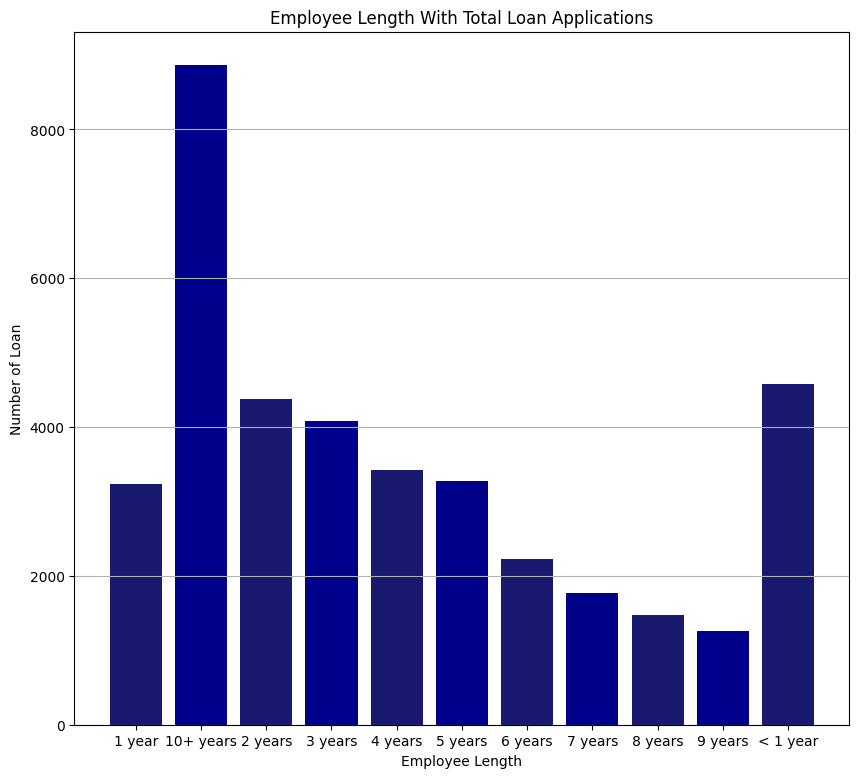

In [44]:
plt.figure(figsize=(10,9))
plt.bar(x=emp_length['emp_length'],height=emp_length['total_loan'],color = ['midnightblue','darkblue'])
plt.title('Employee Length With Total Loan Applications')
plt.xlabel('Employee Length')
plt.grid(axis='y')
plt.ylabel('Number of Loan')
plt.show()

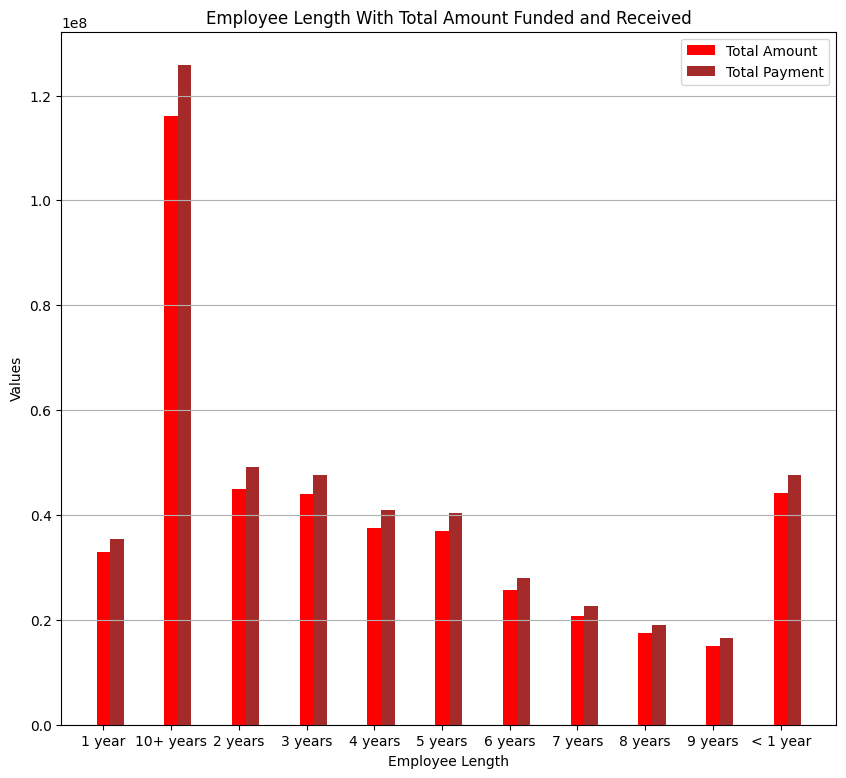

In [45]:
x = np.arange(len(emp_length['emp_length'])) 
width = 0.2 
fig, ax = plt.subplots(figsize=(10, 9))
bars1 = ax.bar(x, emp_length['total_amount'], width, label='Total Amount', color=colors[1])
bars2 = ax.bar(x + width, emp_length['total_payment'], width, label='Total Payment', color=colors[2])
ax.set_xlabel('Employee Length')
ax.set_ylabel('Values')
ax.set_title('Employee Length With Total Amount Funded and Received')
ax.set_xticks(x)
plt.grid(axis='y')
ax.set_xticklabels(emp_length['emp_length'])
ax.legend()
plt.show()

5. Loan Purpose Breakdown (Bar Chart)

In [46]:
loan_purpose = data.groupby(data['purpose']).agg(
    total_loan = ('id' , 'size'),
    total_amount = ('loan_amount','sum'),
    total_payment = ('total_payment' , 'sum')
).reset_index()
loan_purpose

,purpose,total_loan,total_amount,total_payment
0,Debt consolidation,18214,232459675,253801871
1,car,1497,10223575,11324914
2,credit card,4998,58885175,65214084
3,educational,315,2161650,2248380
4,home improvement,2876,33350775,36380930
5,house,366,4824925,5185538
6,major purchase,2110,17251600,18676927
7,medical,667,5533225,5851372
8,moving,559,3748125,3999899
9,other,3824,31155750,33289676


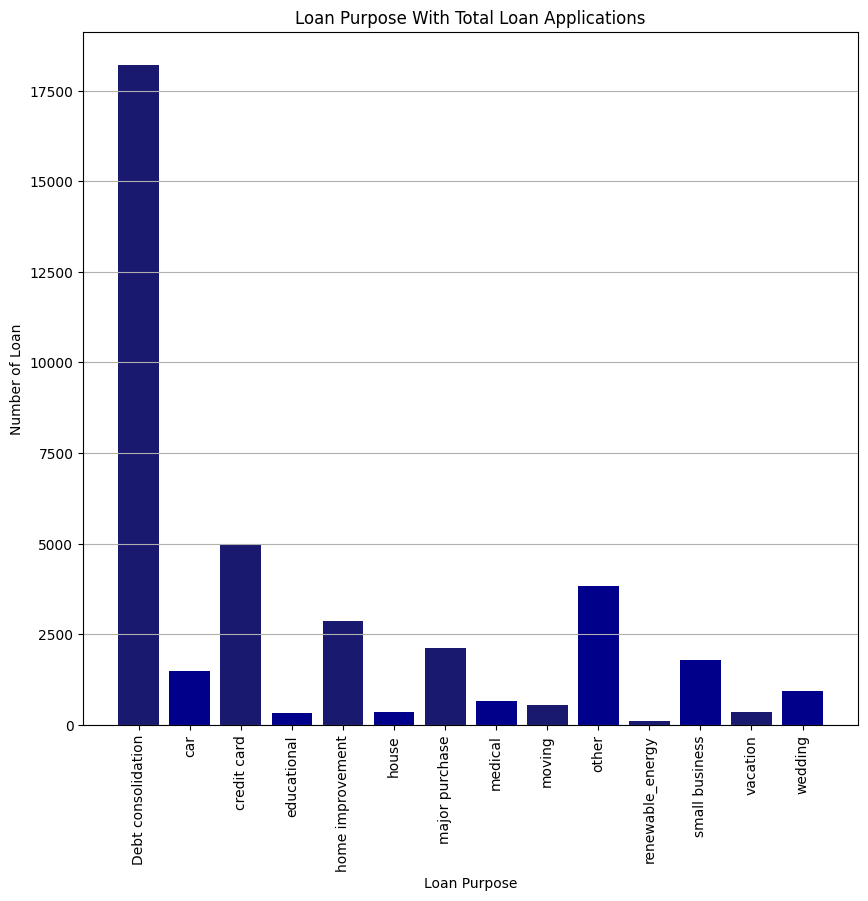

In [47]:
plt.figure(figsize=(10,9))
plt.bar(x=loan_purpose['purpose'],height=loan_purpose['total_loan'],color = ['midnightblue','darkblue'])
plt.title('Loan Purpose With Total Loan Applications')
plt.xlabel('Loan Purpose')
plt.xticks(rotation = 90)
plt.grid(axis='y')
plt.ylabel('Number of Loan')
plt.show()

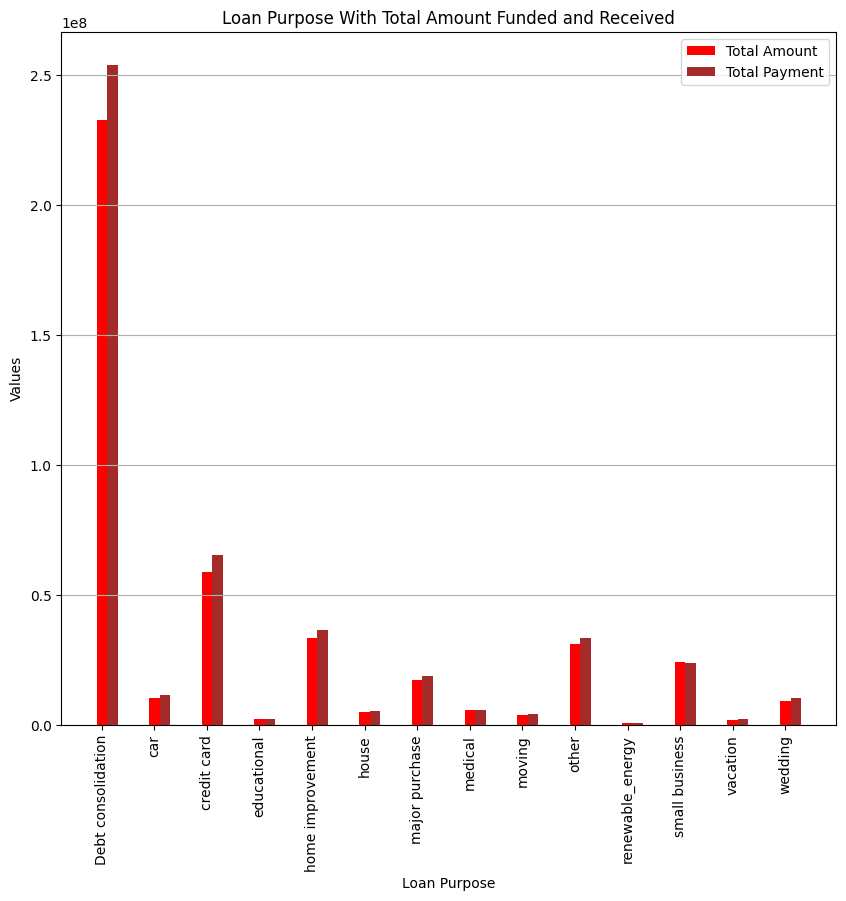

In [48]:
x = np.arange(len(loan_purpose['purpose'])) 
width = 0.2 
fig, ax = plt.subplots(figsize=(10, 9))
bars1 = ax.bar(x, loan_purpose['total_amount'], width, label='Total Amount', color=colors[1])
bars2 = ax.bar(x + width, loan_purpose['total_payment'], width, label='Total Payment', color=colors[2])
ax.set_xlabel('Loan Purpose')
ax.set_ylabel('Values')
ax.set_title('Loan Purpose With Total Amount Funded and Received')
ax.set_xticks(x)
ax.set_xticklabels(loan_purpose['purpose'],rotation = 90)
plt.grid(axis='y')
ax.legend()
plt.show()

6. Home Ownership Analysis (Tree Map)

In [49]:
home_ownership = data.groupby(data['home_ownership']).agg(
    total_loan = ('id' , 'size'),
    total_amount = ('loan_amount','sum'),
    total_payment = ('total_payment' , 'sum')
).reset_index()
home_ownership

,home_ownership,total_loan,total_amount,total_payment
0,MORTGAGE,17198,219329150,238474438
1,NONE,3,16800,19053
2,OTHER,98,1044975,1025257
3,OWN,2838,29597675,31729129
4,RENT,18439,185768475,201823056


In [50]:
none_other_combined = home_ownership[home_ownership['home_ownership'].isin(['NONE', 'OTHER'])].sum(numeric_only=True)
none_other_combined['home_ownership'] = 'OTHER and NONE'
none_other_combined = pd.DataFrame([none_other_combined])   
none_other_combined = none_other_combined[['home_ownership', 'total_loan', 'total_amount', 'total_payment']]
df_new = home_ownership[~home_ownership['home_ownership'].isin(['NONE', 'OTHER'])]
df_new = pd.concat([df_new, none_other_combined], ignore_index=True).reset_index()
home_ownership = pd.DataFrame(df_new)
home_ownership

,index,home_ownership,total_loan,total_amount,total_payment
0,0,MORTGAGE,17198,219329150,238474438
1,1,OWN,2838,29597675,31729129
2,2,RENT,18439,185768475,201823056
3,3,OTHER and NONE,101,1061775,1044310


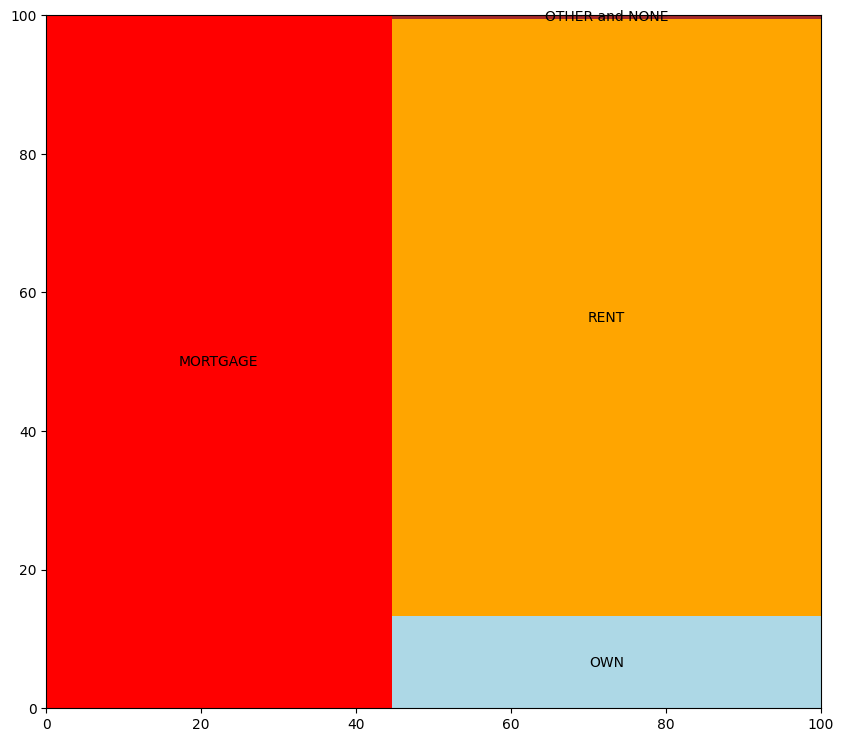

In [51]:
plt.figure(figsize=(10,9))
squarify.plot(sizes=home_ownership['total_loan'],label=home_ownership['home_ownership'],color= ['red','lightblue','orange','brown'])
plt.show()